**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: ESTEFANIA KARINA MARQUEZ GUERRA
*   MATRÍCULA: A01150901

En esta actividad trabajarás con el archivo `personal_loan.csv`, basado en un conjunto de datos sobre clientes bancarios y su comportamiento financiero disponible en Kaggle.

Los datos fueron recopilados para analizar la posibilidad de que los clientes acepten un préstamo personal y contienen información demográfica, financiera y de productos bancarios asociados. Los indicadores incluidos son:

* `ID`: Identificador único del cliente
* `Age`: Edad del cliente (años completos)
* `Experience`: Experiencia laboral en años
* `Income`: Ingreso anual del cliente (en miles de dólares. Por ejemplo, 60 = 60,000 USD/año)
* `ZIP Code`: Código postal del cliente
* `Family`: Número de miembros de la familia
* `CCAvg`: Promedio de gastos mensuales con tarjeta de crédito (en miles de dólares)
* `Education`: Nivel educativo (1 = graduado, 2 = universitario, 3 = posgrado)
* `Mortgage`: Monto de hipoteca que posee el cliente (en miles de dólares)
* `Securities Account`: Indicador de si tiene cuenta de valores (1 = sí, 0 = no)
* `CD Account`: Indicador de si tiene cuenta de certificado de depósito (1 = sí, 0 = no)
* `Online`: Indicador de si usa los servicios bancarios en línea (1 = sí, 0 = no)
* `CreditCard`: Indicador de si es titular de tarjeta de crédito (1 = sí, 0 = no)
* `Personal Loan`: Si el cliente aceptó (1) o no (0) un préstamo personal. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

1. Descarga el archivo: `personal_loan.csv` y guarda, en un dataframe (`loan_df`), todos sus registros.
* Haz que la columna `ID` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?

In [2]:
loan_df = pd.read_csv("personal_loan.csv")
loan_df.set_index("ID", inplace=True)

print(loan_df.info())
original_len = len(loan_df)
print('Longitud del DataFrame (inicial):', original_len)

# ¿Cuántas columnas numéricas vs texto?
int_cols_ini   = loan_df.select_dtypes(include=["int64"]).columns.tolist()
float_cols_ini = loan_df.select_dtypes(include=["float64"]).columns.tolist()
obj_cols_ini   = loan_df.select_dtypes(include=["object"]).columns.tolist()
print("\nColumnas int64:", int_cols_ini, "Total:", len(int_cols_ini))
print("Columnas float64:", float_cols_ini, "Total:", len(float_cols_ini))
print("Columnas object:", obj_cols_ini, "Total:", len(obj_cols_ini))

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 5036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5037 non-null   int64  
 1   Experience          5037 non-null   int64  
 2   Income              5037 non-null   int64  
 3   ZIP Code            5037 non-null   int64  
 4   Family              5037 non-null   int64  
 5   CCAvg               5037 non-null   float64
 6   Education           5037 non-null   float64
 7   Mortgage            5037 non-null   int64  
 8   Personal Loan       5037 non-null   object 
 9   Securities Account  5037 non-null   object 
 10  CD Account          5037 non-null   object 
 11  Online              5037 non-null   object 
 12  CreditCard          5037 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 550.9+ KB
None
Longitud del DataFrame (inicial): 5037

Columnas int64: ['Age', 'Experience', 'Income', 'ZIP C

# Limpieza

2. Obtén las estadísticas descriptivas de las variables numéricas y examina cuidadosamente los valores obtenidos de cada columna.
* Filtra el dataframe para visualizar los registros en que la edad supera los 100 años y elimínalos si no son pausibles.
* Analiza el resto de las variables y elimina aquellos registros que contengan valores inválidos o inconsistentes. Para cada acción que realices, justifica la decisión, explicando por qué consideras que el valor es incorrecto.
* ¿Cuántos registros se eliminaron (considerando todas las acciones de este ejercicio) y qué porcentaje representa respecto al total del dataframe inicial?

In [3]:
# 2.1 Eliminar edades no plausibles (>100)
print("\nRegistros con Age > 100 (pre-eliminación):", (loan_df["Age"] > 100).sum())
loan_df = loan_df[loan_df["Age"] <= 100]

# 2.2 Unificar binarios a 0/1 (acepta 'yes'/'no' o '1'/'0' en texto)
yn_cols = ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]
for col in yn_cols:
    loan_df[col] = loan_df[col].astype(str).str.strip().str.lower().map({
        "yes": 1, "no": 0, "1": 1, "0": 0
    })
# quitar filas con valores raros no mapeables
loan_df = loan_df.dropna(subset=yn_cols)
for col in yn_cols:
    loan_df[col] = loan_df[col].astype(int)

# 2.3 Otras validaciones simples
loan_df = loan_df[loan_df["Experience"] >= 0]   # experiencia negativa no plausible
loan_df = loan_df[loan_df["Family"] >= 0]       # tamaño de familia negativo no plausible

# 2.4 Education debe ser 1, 2 o 3 (entero)
loan_df["Education"] = loan_df["Education"].round().astype(int)
loan_df = loan_df[loan_df["Education"].isin([1, 2, 3])]

# Reporte tras limpieza (solo paso 2)
after_clean_len = len(loan_df)
elim_clean = original_len - after_clean_len
pct_clean = (elim_clean / original_len) * 100
print("\nPrimeros registros después de limpiar (paso 2):")
print(loan_df.head(10))
print('Longitud después de limpieza (paso 2):', after_clean_len)
print(f"Registros eliminados en paso 2: {elim_clean}  ({pct_clean:.2f}%)")


Registros con Age > 100 (pre-eliminación): 3

Primeros registros después de limpiar (paso 2):
    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
ID                                                                          
0    25           1      49     91108       4    1.6          1         0   
1    45          19      34     90089       3    1.5          1         0   
2    39          15      11     94720       1    1.0          1         0   
3    35           9     100     94112       1    2.7          2         0   
4    35           8      45     91330       4    1.0          2         0   
5    37          13      29     92121       4    0.4          2       155   
6    53          27      72     91711       2    1.5          2         0   
7    50          24      22     93943       1    0.3          3         0   
8    35          10      81     90089       3    0.6          2       104   
9    34           9     180     93023       1    8.9      

3. Obtén las estadísticas descriptivas de las variables de texto e imprime las frecuencias de sus categorías.
* Algunas columnas almacenan valores binarios utilizando distintos formatos. Unifica estos valores de manera consistente, asegurándote de que coincidan con la descripción de las variables al inicio de esta libreta.

In [4]:
# 2.2 Unificar binarios a 0/1 (acepta 'yes'/'no' o '1'/'0' en texto)
yn_cols = ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]
for col in yn_cols:
    loan_df[col] = loan_df[col].astype(str).str.strip().str.lower().map({
        "yes": 1, "no": 0, "1": 1, "0": 0
    })
# quitar filas con valores raros no mapeables
loan_df = loan_df.dropna(subset=yn_cols)
for col in yn_cols:
    loan_df[col] = loan_df[col].astype(int)

print("\nFrecuencias de variables binarias (0=No, 1=Sí):")
for col in yn_cols:
    print(f"\n{col}:\n", loan_df[col].value_counts(dropna=False))


Frecuencias de variables binarias (0=No, 1=Sí):

Personal Loan:
 Personal Loan
0    4493
1     485
Name: count, dtype: int64

Securities Account:
 Securities Account
0    4459
1     519
Name: count, dtype: int64

CD Account:
 CD Account
0    4675
1     303
Name: count, dtype: int64

Online:
 Online
1    2976
0    2002
Name: count, dtype: int64

CreditCard:
 CreditCard
0    3513
1    1465
Name: count, dtype: int64


4. Verifica si hay registros duplicados y si fuera así, elimínalos del dataframe.
* Asegúrate de reiniciar el índice para mantener una secuencia continua tras todas las eliminaciones de registros que hasta este punto se han realizado.

In [5]:
duplicados = loan_df.duplicated().sum()
print("\nNúmero de registros duplicados:", duplicados)
if duplicados > 0:
    loan_df = loan_df.drop_duplicates()
    print("Duplicados eliminados.")

loan_df.reset_index(drop=True, inplace=True)


Número de registros duplicados: 36
Duplicados eliminados.


5. Aunque hasta ahora se han considerado los tipos de datos inferidos por pandas, antes del EDA es recomendable revisar la naturaleza estadística de cada variable (continua, discreta, categórica, binaria, etc.) para aplicar el análisis adecuado.

* Efectúa las siguientes conversiones:
  - Nominal: ZIP Code - `object`
  - Ordinal: Education - `category` con orden 1, 2, 3
  - Binarias: Personal Loan, Securities Account, CD Account, Online, CreditCard - `category`
* Crea dos listas llamadas `num_cols` y `cat_cols` que contengan los nombres de las variables numéricas (int64, float64) y categóricas (object, category) del dataset, respectivamente.

In [6]:
loan_df["ZIP Code"] = loan_df["ZIP Code"].astype(str)

# Education como categoría ordinal (1<2<3)
loan_df["Education"] = pd.Categorical(loan_df["Education"], categories=[1, 2, 3], ordered=True)

# Binarias como categoría (manteniendo 0/1)
for col in yn_cols:
    loan_df[col] = pd.Categorical(loan_df[col], categories=[0, 1])

# Listas de numéricas y categóricas
num_cols = loan_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = loan_df.select_dtypes(include=["object", "category"]).columns.tolist()
print("\nColumnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)


Columnas numéricas: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Columnas categóricas: ['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


# Análisis exploratorio de datos (univariado)

6. Para el análisis de las variables numéricas obtén nuevamente las estadísticas descriptivas incluyendo los valores de simetría y curtosis.
* Clasifica las variables `Age`, `Income` y `Mortgage` según los valores observados de asimetría y curtosis.

In [7]:
num_summary = loan_df[num_cols].agg(
    ["count", "mean", "median", "std", "min", "max", "skew", "kurt"]
).T
print("\n[6] Resumen numérico con asimetría y curtosis:\n")
print(num_summary)

# Funciones de clasificación sencillas
def clasificar_asimetria(sk):
    if abs(sk) < 0.1:
        return "≈ simétrica"
    elif sk > 0:
        return "asimetría positiva (sesgo a la derecha)"
    else:
        return "asimetría negativa (sesgo a la izquierda)"

def clasificar_curtosis(ku):
    # Fisher: 0 ~ normal; >0 leptocúrtica; <0 platicúrtica
    if ku > 0.5:
        return "leptocúrtica (> 0)"
    elif ku < -0.5:
        return "platicúrtica (< 0)"
    else:
        return "≈ mesocúrtica (cercana a 0)"

print("\n[6] Clasificación para Age, Income y Mortgage:\n")
for col in ["Age", "Income", "Mortgage"]:
    sk = loan_df[col].skew()
    ku = loan_df[col].kurt()
    print(f"- {col}: {clasificar_asimetria(sk)} | {clasificar_curtosis(ku)} "
          f"(skew={sk:.3f}, kurt={ku:.3f})")


[6] Resumen numérico con asimetría y curtosis:

             count       mean  median         std   min    max      skew  \
Age         4942.0  45.561311    46.0   11.314736  24.0   67.0 -0.023024   
Experience  4942.0  20.336301    20.0   11.307402   0.0   43.0 -0.015453   
Income      4942.0  73.815864    64.0   46.108226   8.0  224.0  0.842132   
Family      4942.0   2.391947     2.0    1.148356   1.0    4.0  0.159089   
CCAvg       4942.0   1.935585     1.5    1.748332   0.0   10.0  1.594922   
Mortgage    4942.0  56.652165     0.0  101.868229   0.0  635.0  2.104183   

                kurt  
Age        -1.161379  
Experience -1.134596  
Income     -0.046006  
Family     -1.404189  
CCAvg       2.636409  
Mortgage    4.761586  

[6] Clasificación para Age, Income y Mortgage:

- Age: ≈ simétrica | platicúrtica (< 0) (skew=-0.023, kurt=-1.161)
- Income: asimetría positiva (sesgo a la derecha) | ≈ mesocúrtica (cercana a 0) (skew=0.842, kurt=-0.046)
- Mortgage: asimetría positiva (ses

7. Genera un histograma para cada variable numérica, incluyendo la curva KDE y la curva de una distribución normal como referencia.
* Para las variables que clasificaste antes, compara los histogramas generados con los valores numéricos calculados y comenta si la forma de cada distribución coincide con lo esperado.
* Para cada variable, crea un gráfico de boxplot individual que incluya la media.
* Analiza la posición de la media respecto a la mediana. ¿Qué indica esta relación sobre el sesgo (asimetría) de la distribución?

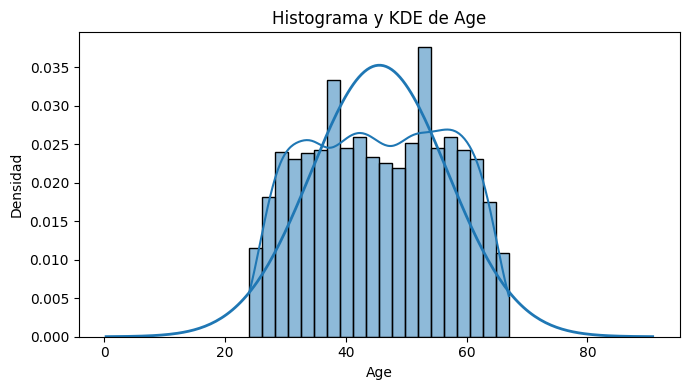

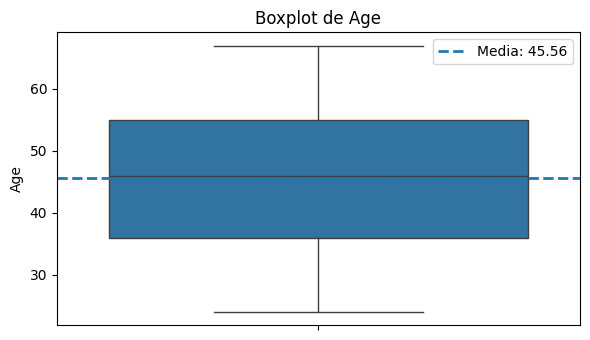

[7] Age: media=45.56, mediana=46.00. Media < mediana → sesgo a la izquierda (asimetría negativa).


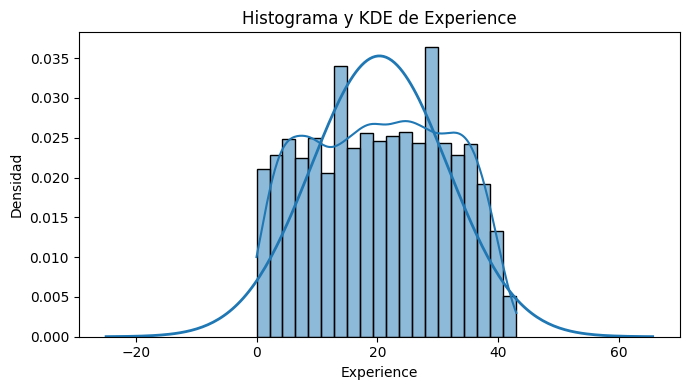

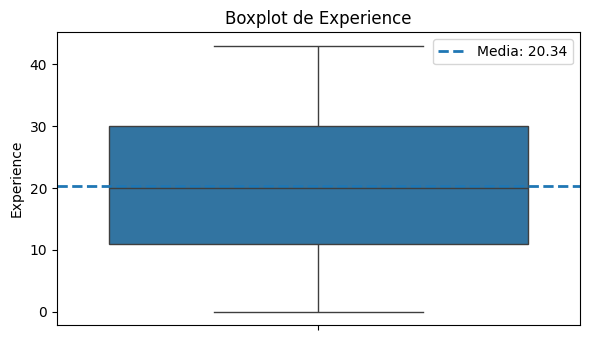

[7] Experience: media=20.34, mediana=20.00. Media > mediana → sesgo a la derecha (asimetría positiva).


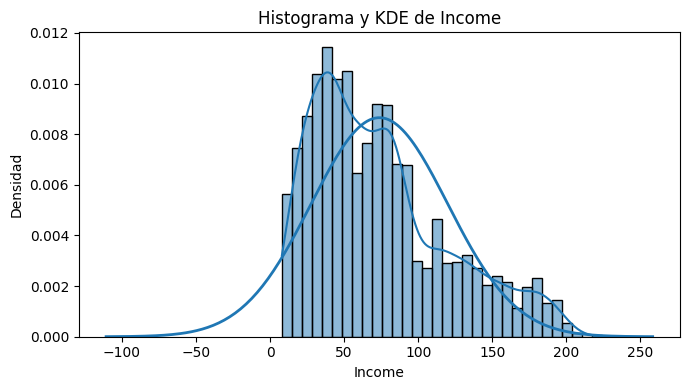

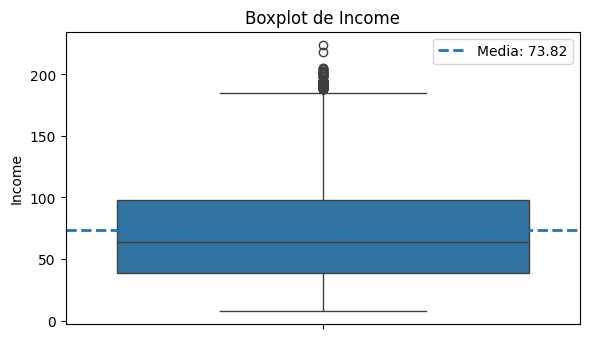

[7] Income: media=73.82, mediana=64.00. Media > mediana → sesgo a la derecha (asimetría positiva).


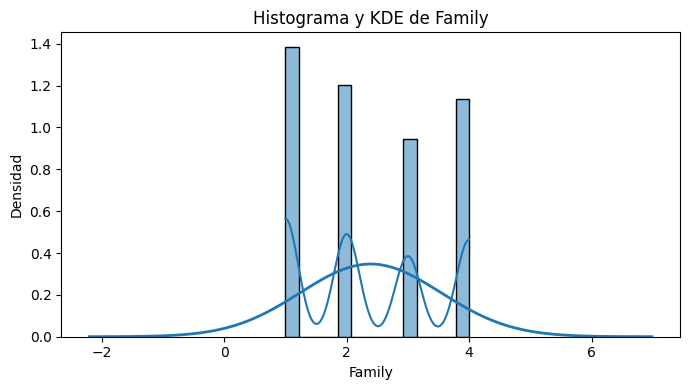

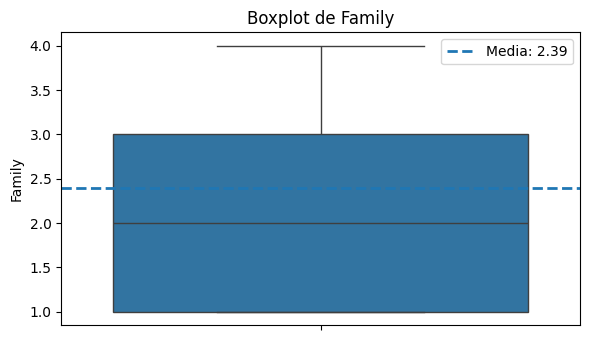

[7] Family: media=2.39, mediana=2.00. Media > mediana → sesgo a la derecha (asimetría positiva).


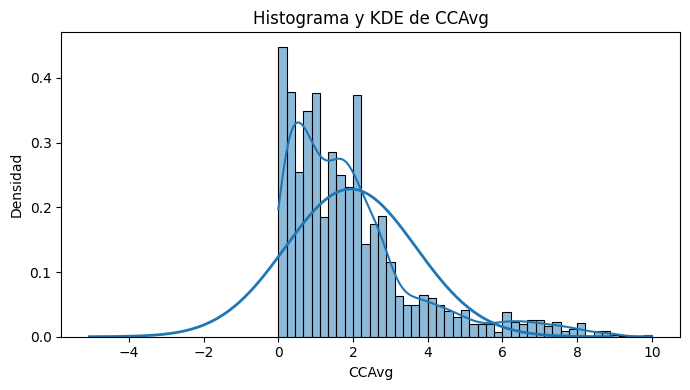

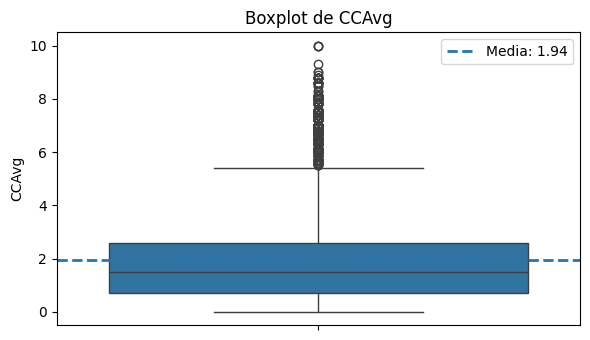

[7] CCAvg: media=1.94, mediana=1.50. Media > mediana → sesgo a la derecha (asimetría positiva).


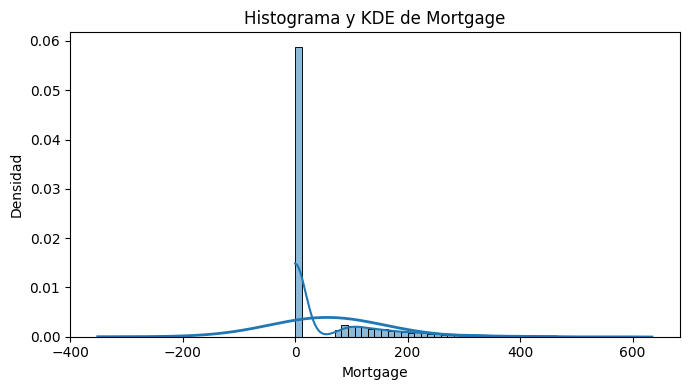

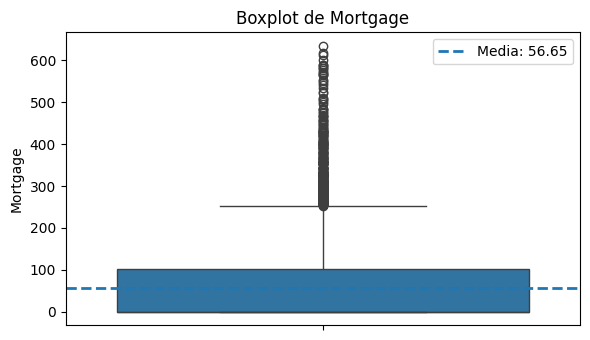

[7] Mortgage: media=56.65, mediana=0.00. Media > mediana → sesgo a la derecha (asimetría positiva).


In [8]:
for col in num_cols:
    serie = loan_df[col].dropna()
    mu = serie.mean()
    sigma = serie.std()

    # --- Histograma + KDE + Normal(mu, sigma) ---
    plt.figure(figsize=(7, 4))
    sns.histplot(serie, bins="auto", stat="density", kde=True)
    # Curva normal de referencia (si hay variabilidad)
    if sigma > 0:
        x = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
        y = norm.pdf(x, loc=mu, scale=sigma)
        plt.plot(x, y, linewidth=2)  # línea de la normal
    plt.title(f"Histograma y KDE de {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.tight_layout()
    plt.show()

    # --- Boxplot individual con línea de la media ---
    plt.figure(figsize=(6, 3.5))
    ax = sns.boxplot(y=serie)
    ax.axhline(mu, linestyle="--", linewidth=2, label=f"Media: {mu:.2f}")
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Comentario automático: relación media vs mediana
    med = serie.median()
    if mu > med:
        comentario = "Media > mediana → sesgo a la derecha (asimetría positiva)."
    elif mu < med:
        comentario = "Media < mediana → sesgo a la izquierda (asimetría negativa)."
    else:
        comentario = "Media ≈ mediana → distribución aproximadamente simétrica."
    print(f"[7] {col}: media={mu:.2f}, mediana={med:.2f}. {comentario}")

8. Obtén las estadísticas descriptivas de las variables categóricas.
* Genera un gráfico de barras para cada variable. En las de alta cardinalidad, sólo incluye los 10 valores más relevantes.


[8] Describe de variables categóricas:

       ZIP Code  Education  Personal Loan  Securities Account  CD Account  \
count      4942       4942           4942                4942        4942   
unique      468          3              2                   2           2   
top       94720          1              0                   0           0   
freq        163       2079           4463                4427        4641   

        Online  CreditCard  
count     4942        4942  
unique       2           2  
top          1           0  
freq      2952        3489  


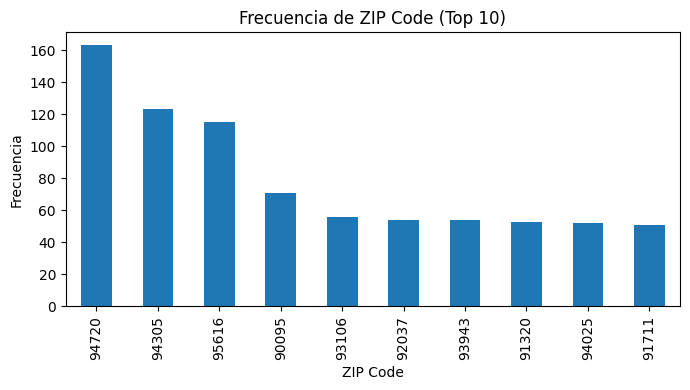

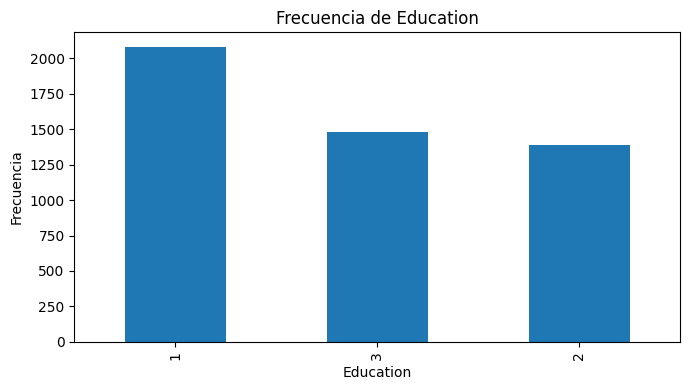

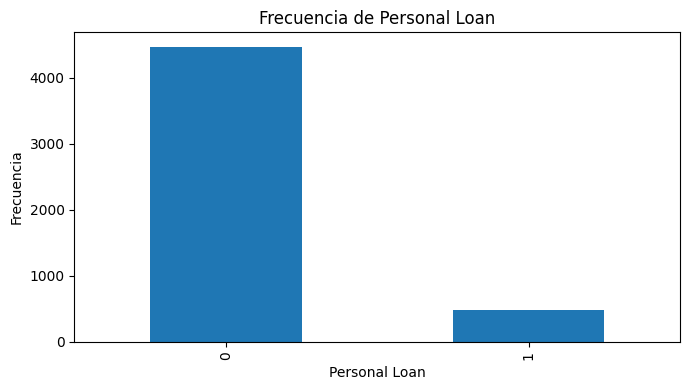

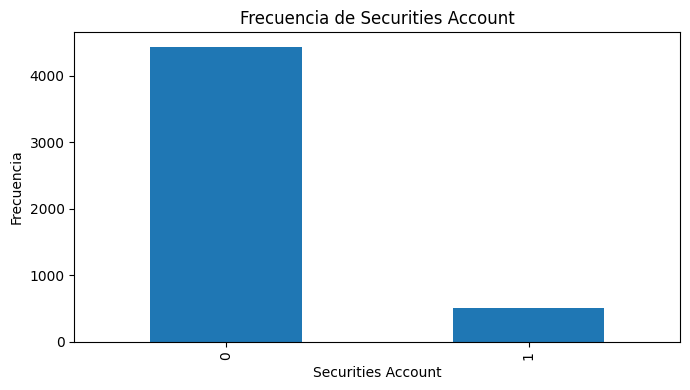

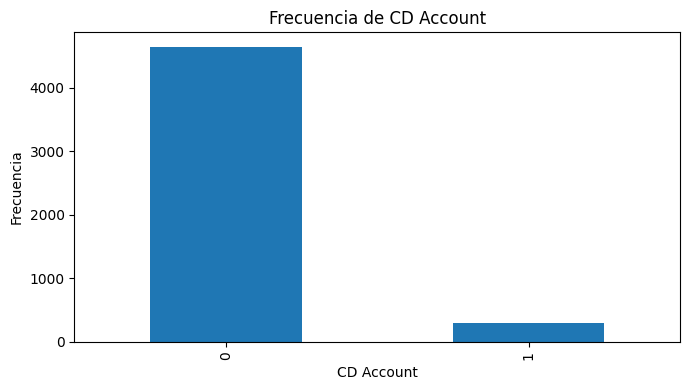

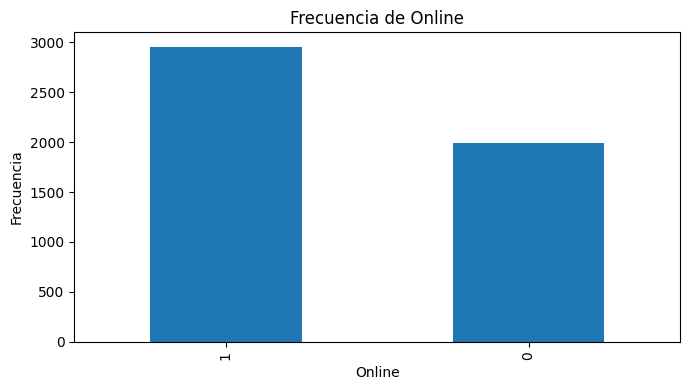

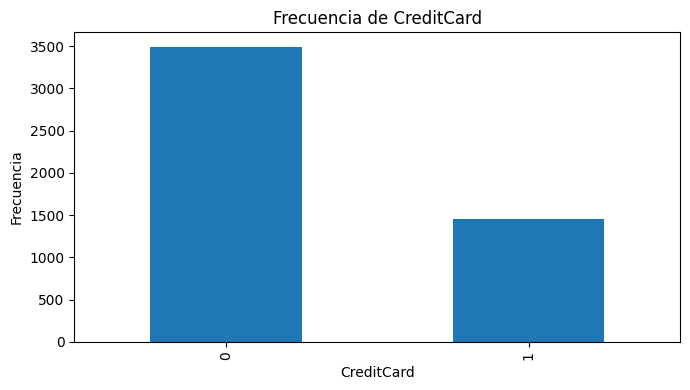

In [9]:
print("\n[8] Describe de variables categóricas:\n")
print(loan_df[cat_cols].describe())

for col in cat_cols:
    vc = loan_df[col].value_counts(dropna=False)
    # Si hay muchas categorías, mostrar top 10
    if len(vc) > 10:
        vc = vc.head(10)
        titulo = f"{col} (Top 10)"
    else:
        titulo = col

    plt.figure(figsize=(7, 4))
    vc.plot(kind="bar")
    plt.title(f"Frecuencia de {titulo}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Análisis exploratorio de datos (bivariado)

9. Obtén la matriz de gráficos de dispersión (*scatter matrix*) de todas las variables numéricas.
* Observa las relaciones entre las variables, selecciona un par representativo y describe los patrones o tendencias que sean evidentes.
* Para cuantificar la fuerza y dirección de las relaciones observadas, genera un mapa de calor con los valores de correlación de *Pearson*. ¿El valor numérico obtenido del par seleccionado se corresponde con lo esperado?

<Figure size 800x800 with 0 Axes>

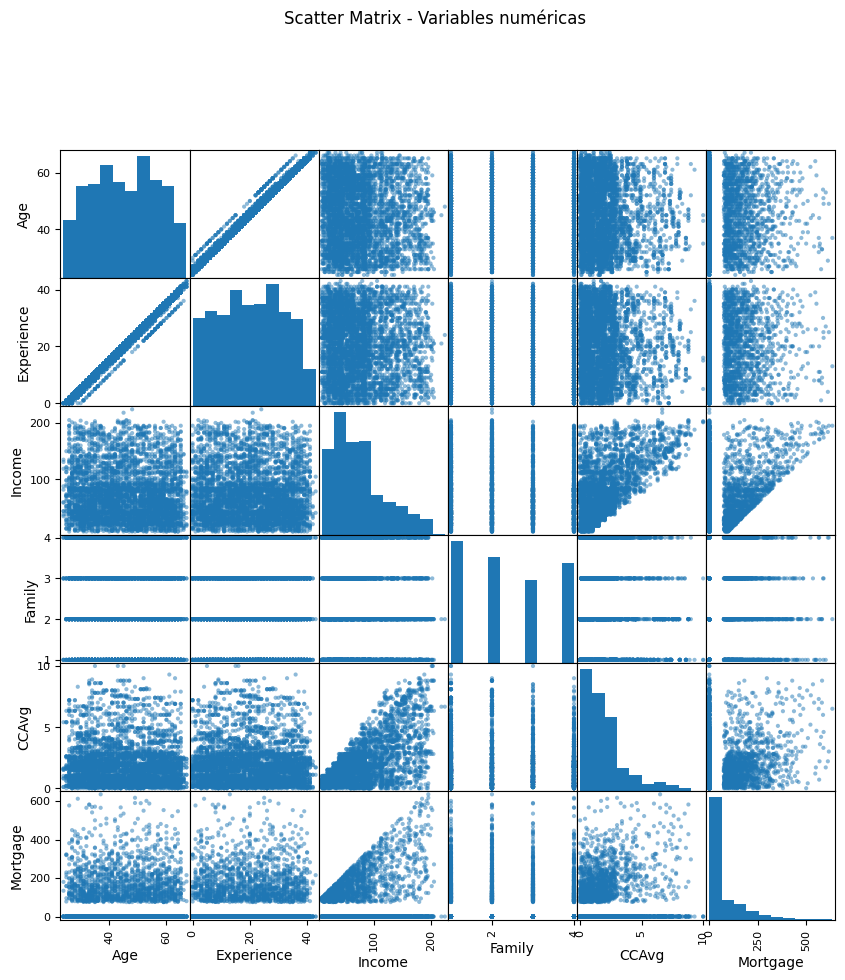

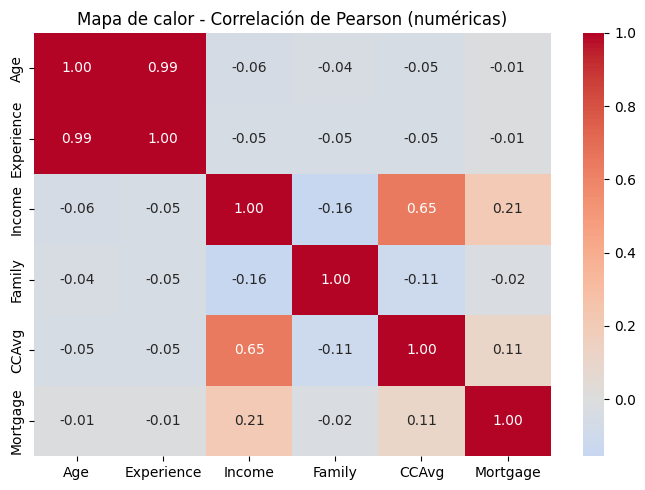

[9] Correlación Income vs CCAvg: 0.646
¿El valor se corresponde con lo esperado al ver la nube de puntos y el mapa de calor?
Sí, a mayor ingreso mayor gasto en tarjetas
[9] Correlación Age vs Experience: 0.994
¿El valor se corresponde con lo esperado al ver la nube de puntos y el mapa de calor?
Sí, a mayor mayor edad mayor experiencia


In [10]:
from pandas.plotting import scatter_matrix

# Scatter matrix (todas las numéricas)
plt.figure(figsize=(8, 8))
scatter_matrix(loan_df[num_cols], figsize=(10, 10), diagonal='hist')
plt.suptitle("Scatter Matrix - Variables numéricas", y=1.02)
plt.show()

# Correlaciones de Pearson
corr = loan_df[num_cols].corr(method='pearson')
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Mapa de calor - Correlación de Pearson (numéricas)")
plt.tight_layout()
plt.show()

# Elegir un par representativo y mostrar su correlación
# (ejemplos típicos: Income vs CCAvg, Age vs Experience)
par1 = ("Income", "CCAvg")
par2 = ("Age", "Experience")

c1 = loan_df[par1[0]].corr(loan_df[par1[1]])
c2 = loan_df[par2[0]].corr(loan_df[par2[1]])

print(f"[9] Correlación {par1[0]} vs {par1[1]}: {c1:.3f}")
print("¿El valor se corresponde con lo esperado al ver la nube de puntos y el mapa de calor?")
print("Sí, a mayor ingreso mayor gasto en tarjetas")

print(f"[9] Correlación {par2[0]} vs {par2[1]}: {c2:.3f}")
print("¿El valor se corresponde con lo esperado al ver la nube de puntos y el mapa de calor?")
print("Sí, a mayor mayor edad mayor experiencia")

10. Realiza un análisis de todas las variables del dataset con respecto a la variable de salida `Personal Loan`.
* Variables numéricas: Genera box plots para comparar la distribución de cada variable según los valores de `Personal Loan`.
* Variables categóricas (sin considerar `ZIP Code`): Genera gráficos de barras apiladas que muestren la distribución relativa de `Personal Loan` dentro de cada categoría de la variable.
* Para cada grupo de variables (numéricas y categóricas), comenta al menos un hallazgo o patrón relevante observado en los gráficos generados.


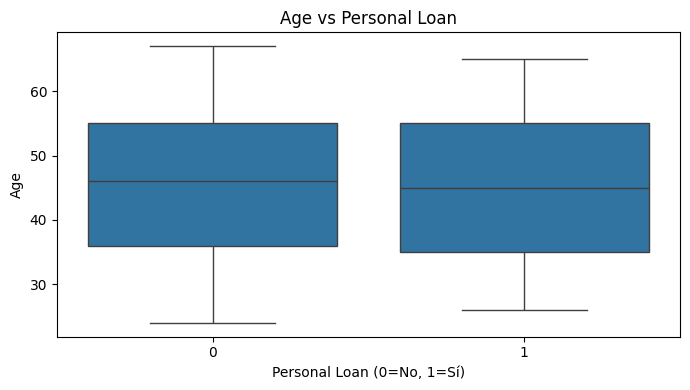

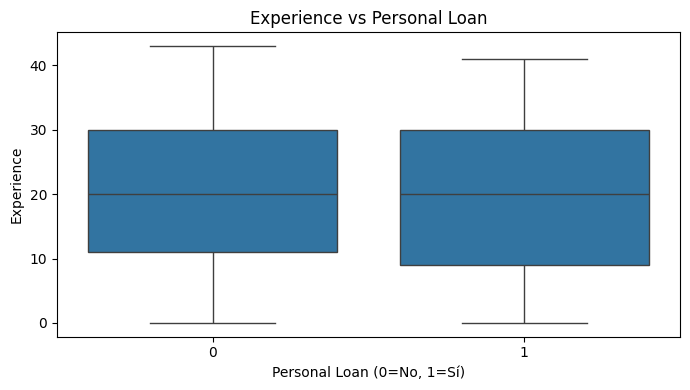

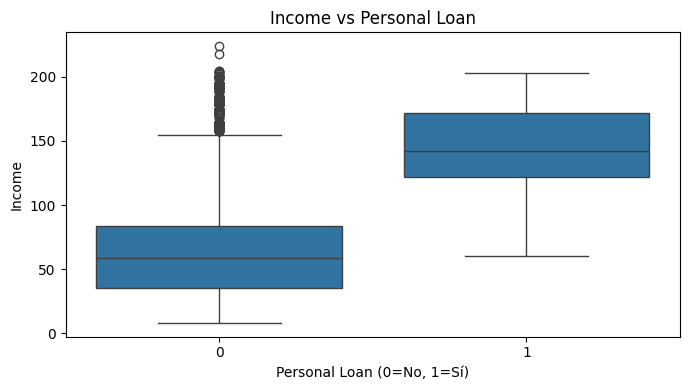

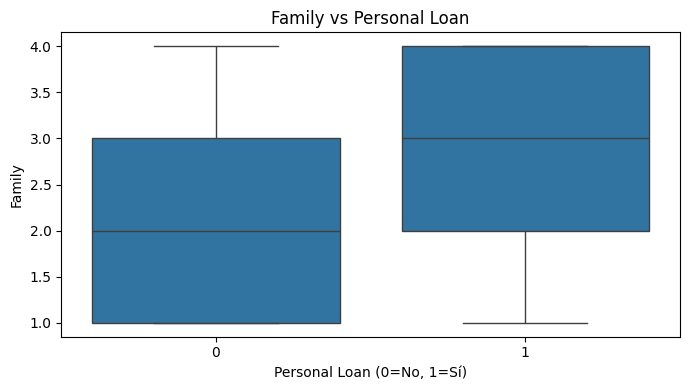

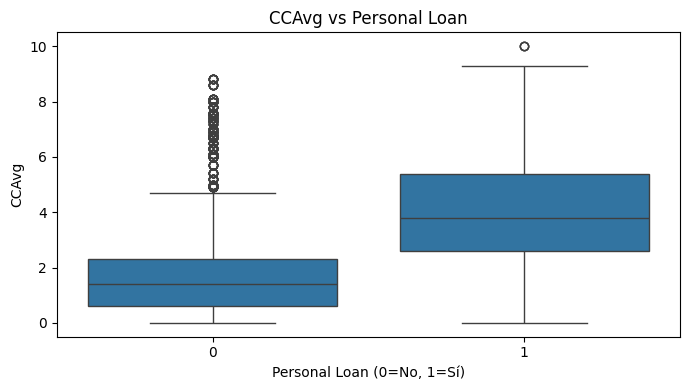

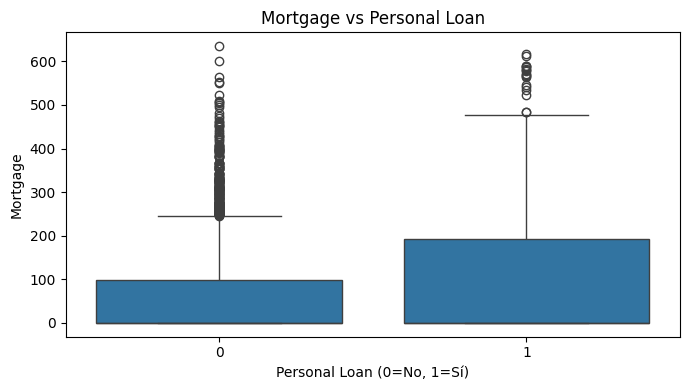


[10-A] Diferencia de medias (Clase=1 menos Clase=0) en variables numéricas:
Income        78.498153
Mortgage      49.169968
CCAvg          2.180266
Family         0.247952
Experience    -0.531906
Age           -0.536020
dtype: float64
Valores positivos: mayores en quienes aceptaron el préstamo (1). Negativos: mayores en (0).


C:\Users\TTPM038\AppData\Local\Temp\ipykernel_28724\328881395.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_by_target = loan_df.groupby("Personal Loan")[num_cols].mean()


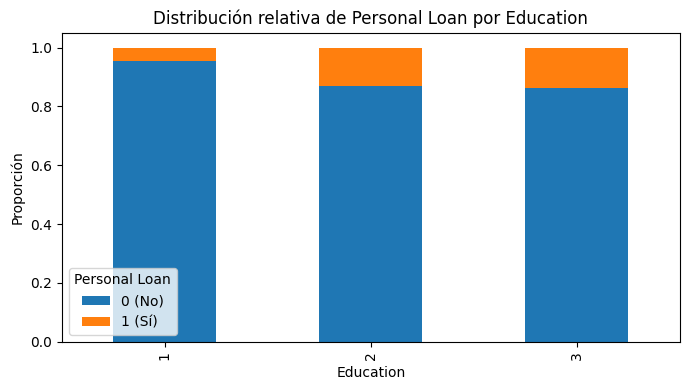

[10-B] Tasa de aceptación (promedio de Personal Loan=1) por Education:
Education
3    0.138701
2    0.130686
1    0.044733
Name: Personal Loan, dtype: float64 



C:\Users\TTPM038\AppData\Local\Temp\ipykernel_28724\328881395.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_df.groupby(col)["Personal Loan"]


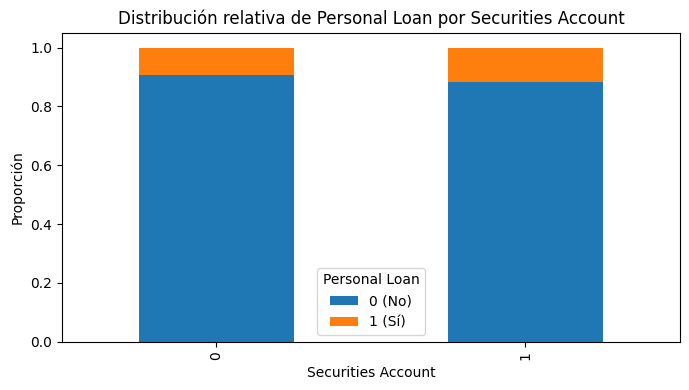

[10-B] Tasa de aceptación (promedio de Personal Loan=1) por Securities Account:
Securities Account
1    0.116505
0    0.094646
Name: Personal Loan, dtype: float64 



C:\Users\TTPM038\AppData\Local\Temp\ipykernel_28724\328881395.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_df.groupby(col)["Personal Loan"]


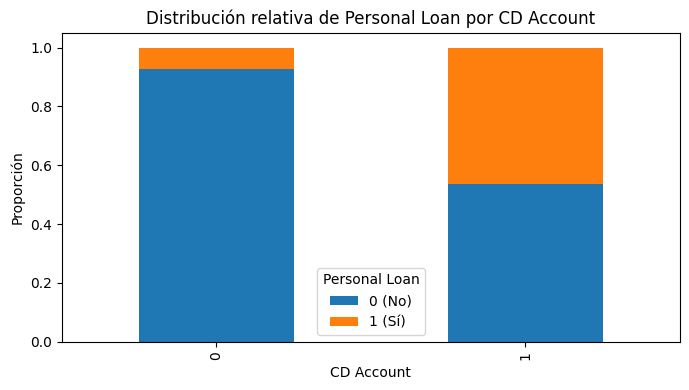

[10-B] Tasa de aceptación (promedio de Personal Loan=1) por CD Account:
CD Account
1    0.465116
0    0.073045
Name: Personal Loan, dtype: float64 



C:\Users\TTPM038\AppData\Local\Temp\ipykernel_28724\328881395.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_df.groupby(col)["Personal Loan"]


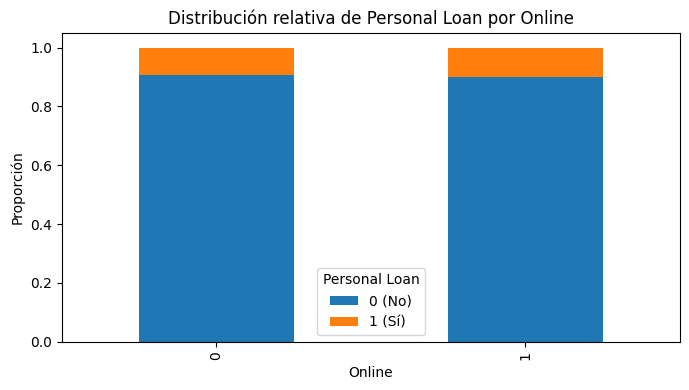

[10-B] Tasa de aceptación (promedio de Personal Loan=1) por Online:
Online
1    0.098577
0    0.094472
Name: Personal Loan, dtype: float64 



C:\Users\TTPM038\AppData\Local\Temp\ipykernel_28724\328881395.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_df.groupby(col)["Personal Loan"]


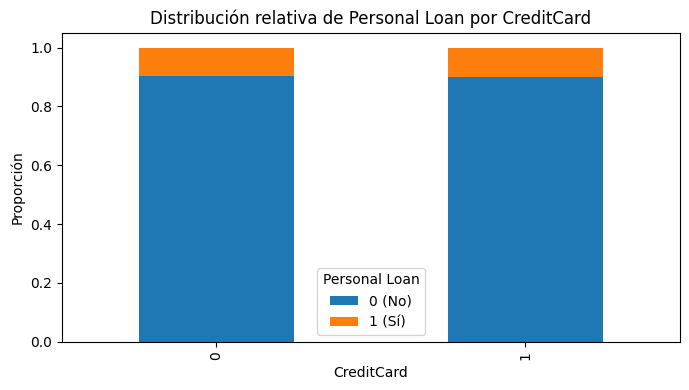

[10-B] Tasa de aceptación (promedio de Personal Loan=1) por CreditCard:
CreditCard
1    0.098417
0    0.096303
Name: Personal Loan, dtype: float64 

Comenta al menos un hallazgo por grupo (numéricas y categóricas) usando los gráficos y tablas impresas.
. Age vs Personal Loan:
   - La edad a la que las personas comienzan a sacar prestamos es despues de los 35
1. Experience vs Personal Loan:
   - La experiencia laboral es similar en clientes con y sin préstamo personal.
   - No es un factor determinante en la decisión de préstamo.

2. Income vs Personal Loan:
   - Los clientes con préstamo tienen ingresos significativamente más altos.
   - El ingreso es un factor importante en la aprobación del préstamo.

3. Family vs Personal Loan:
   - Los clientes sin préstamo tienden a tener familias más pequeñas (mediana ≈ 2).
   - Los clientes con préstamo tienden a tener familias más grandes (mediana ≈ 3).
   - El tamaño de la familia puede estar asociado con una mayor probabilidad de préstamo.

4

C:\Users\TTPM038\AppData\Local\Temp\ipykernel_28724\328881395.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_df.groupby(col)["Personal Loan"]


In [11]:
for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=loan_df, x="Personal Loan", y=col)
    plt.title(f"{col} vs Personal Loan")
    plt.xlabel("Personal Loan (0=No, 1=Sí)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Comentario rápido (diferencia de medias por clase)
print("\n[10-A] Diferencia de medias (Clase=1 menos Clase=0) en variables numéricas:")
means_by_target = loan_df.groupby("Personal Loan")[num_cols].mean()
diff_means = (means_by_target.loc[1] - means_by_target.loc[0]).sort_values(ascending=False)
print(diff_means)
print("Valores positivos: mayores en quienes aceptaron el préstamo (1). Negativos: mayores en (0).")

# --- B) Categóricas (sin ZIP Code): barras apiladas con distribución relativa de Personal Loan ---
cats_for_bars = [c for c in cat_cols if c not in ["ZIP Code", "Personal Loan"]]

for col in cats_for_bars:
    # distribución relativa del target dentro de cada categoría
    ct = pd.crosstab(loan_df[col], loan_df["Personal Loan"], normalize='index')  # filas suman 1
    ct = ct[[0, 1]] if 0 in ct.columns and 1 in ct.columns else ct  # asegurar orden si están ambas clases
    ax = ct.plot(kind="bar", stacked=True, figsize=(7, 4))
    plt.title(f"Distribución relativa de Personal Loan por {col}")
    plt.xlabel(col)
    plt.ylabel("Proporción")
    plt.legend(title="Personal Loan", labels=["0 (No)", "1 (Sí)"] if 0 in ct.columns and 1 in ct.columns else None)
    plt.tight_layout()
    plt.show()

    # tasa de aceptación por categoría (útil para comentar hallazgos)
    tasa = (
        loan_df.groupby(col)["Personal Loan"]
           .apply(lambda s: s.astype(int).mean())
           .sort_values(ascending=False)
    )
    print(f"[10-B] Tasa de aceptación (promedio de Personal Loan=1) por {col}:")
    print(tasa.head(10), "\n")

print("Comenta al menos un hallazgo por grupo (numéricas y categóricas) usando los gráficos y tablas impresas.")
print(". Age vs Personal Loan:")
print("   - La edad a la que las personas comienzan a sacar prestamos es despues de los 35")

print("1. Experience vs Personal Loan:")
print("   - La experiencia laboral es similar en clientes con y sin préstamo personal.")
print("   - No es un factor determinante en la decisión de préstamo.\n")

print("2. Income vs Personal Loan:")
print("   - Los clientes con préstamo tienen ingresos significativamente más altos.")
print("   - El ingreso es un factor importante en la aprobación del préstamo.\n")

print("3. Family vs Personal Loan:")
print("   - Los clientes sin préstamo tienden a tener familias más pequeñas (mediana ≈ 2).")
print("   - Los clientes con préstamo tienden a tener familias más grandes (mediana ≈ 3).")
print("   - El tamaño de la familia puede estar asociado con una mayor probabilidad de préstamo.\n")

print("4. CCAvg vs Personal Loan:")
print("   - Los clientes con préstamo muestran un gasto promedio con tarjeta mucho mayor.")
print("   - Existe una relación positiva entre gasto en tarjeta de crédito y préstamo personal.\n")

print("5. Mortgage vs Personal Loan:")
print("   - Existe mucha dispersión, en ambos grupos las hipotecas varían mucho y hay varios valores atípicos.")
print("   - Los clientes con préstamo tienden a hipotecas más altas, aunque no es un factor tan decisivo.\n")

print("Conclusión general:")
print("   - Income y CCAvg son los factores más diferenciadores.")
print("   - Family y Mortgage tienen un efecto moderado.")
print("   - Experience muestra poca relevancia en la decisión de otorgar un préstamo.")

print("6. Education vs Personal Loan:")
print("   - A mayor nivel educativo (2 y 3), aumenta la proporción de clientes con préstamo personal.")
print("   - Los clientes con educación básica (1) tienen una tasa muy baja de préstamos.\n")

print("7. Securities Account vs Personal Loan:")
print("   - Los clientes con cuenta de valores (Securities Account = 1) tienen una ligera mayor proporción de préstamos.")
print("   - Sin embargo, la diferencia no es tan grande respecto a quienes no tienen.\n")

print("8. CD Account vs Personal Loan:")
print("   - Los clientes con cuenta de certificados (CD Account = 1) tienen una proporción muy alta de préstamos.")
print("   - Esta variable parece ser un fuerte indicador en la aceptación del préstamo personal.\n")

print("9. Online vs Personal Loan:")
print("   - La diferencia entre clientes que usan servicios online y los que no es pequeña.")
print("   - El canal online no parece ser un factor muy determinante para tener un préstamo.\n")

print("10. CreditCard vs Personal Loan:")
print("   - Los clientes con tarjeta de crédito tienen una proporción ligeramente mayor de préstamos.")
print("   - Sin embargo, la diferencia es baja comparada con Education o CD Account.\n")

print("Conclusión general (categóricas):")
print("   - CD Account y Education muestran una fuerte relación con la tenencia de préstamo personal.")
print("   - Securities Account y CreditCard tienen un efecto moderado.")
print("   - Online muestra muy poca relevancia en la decisión de préstamo.")